# Kaggle User: vidurnair 


In [3]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
csv_path = r"C:\Users\VIDUR\Desktop\PYTHON\FA590\Assignment #1\lc_loan.csv"
loan_data = pd.read_csv(csv_path)
print("Size of Dataset : " + str(loan_data.shape))

Size of Dataset : (933160, 37)


In [ ]:
loan_data.head()

,id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,early_default,return
0,1077501,5000.0,5000.0,0.1065,162.87,B,B2,10+ years,RENT,24000.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.172631
1,1077175,2400.0,2400.0,0.1596,84.33,C,C5,10+ years,RENT,12252.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.252361
2,1076863,10000.0,10000.0,0.1349,339.31,C,C1,10+ years,RENT,49200.0,...,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.223189
3,1075269,5000.0,5000.0,0.0790,156.46,A,A4,3 years,RENT,36000.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.126442
4,1072053,3000.0,3000.0,0.1864,109.43,E,E1,9 years,RENT,48000.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.313045


## SEMMA: Sample


## SEMMA: Explore and Modification


##### Summary Statistics


In [11]:
# Summary Statistics

# Split the dataset into train and test sets in a 7:3 ratio
train, test = train_test_split(loan_data, test_size=0.3, random_state=42)

summary_stats = pd.DataFrame(train, columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'revol_bal', 'revol_util', 'total_acc']).describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
            loan_amnt       int_rate    installment    annual_inc  \
count  653212.000000  653212.000000  653212.000000  6.532120e+05   
mean    12554.811187       0.119789     416.175036  7.411166e+04   
std      8037.890975       0.039930     268.616795  6.892993e+04   
min       500.000000       0.053200      14.770000  3.000000e+03   
25%      6425.000000       0.089000     215.630000  4.400000e+04   
50%     10000.000000       0.115300     339.310000  6.200000e+04   
75%     16225.000000       0.143300     549.770000  9.000000e+04   
max     40000.000000       0.309900    1584.900000  9.573072e+06   

                 dti  fico_range_low  fico_range_high     revol_bal  \
count  653212.000000   653212.000000    653212.000000  6.532120e+05   
mean       17.832045      695.117121       699.117239  1.566762e+04   
std         8.377590       31.326317        31.326883  2.258508e+04   
min        -1.000000      660.000000       664.000000  0.000000e+00   
25%        

##### Correlation Matrix

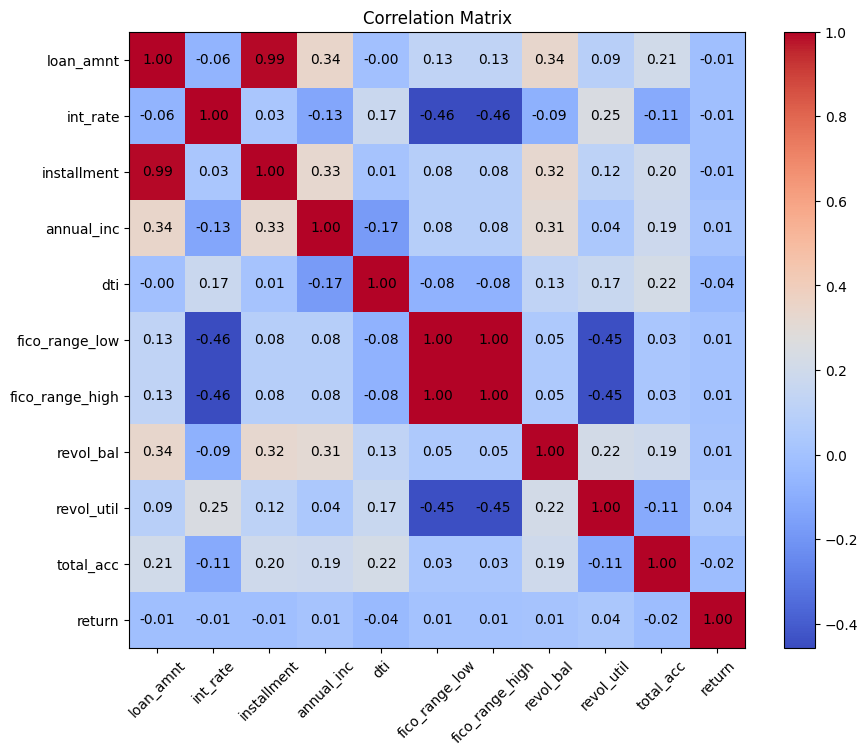

In [12]:
#We have made a Correlation matrix in here
feature_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'revol_bal', 'revol_util', 'total_acc', 'return']
correlation_matrix = train[feature_columns].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

# Annotate the correlation coefficients on the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

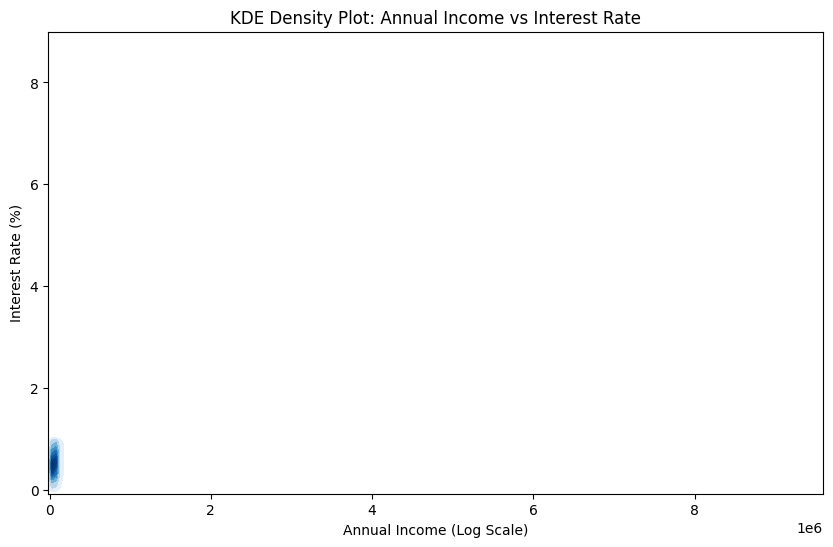

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data= loan_data, x="annual_inc", y="revol_util", fill=True, cmap="Blues")
plt.xlabel("Annual Income (Log Scale)")
plt.ylabel("Interest Rate (%)")
plt.title("KDE Density Plot: Annual Income vs Interest Rate")
plt.show()

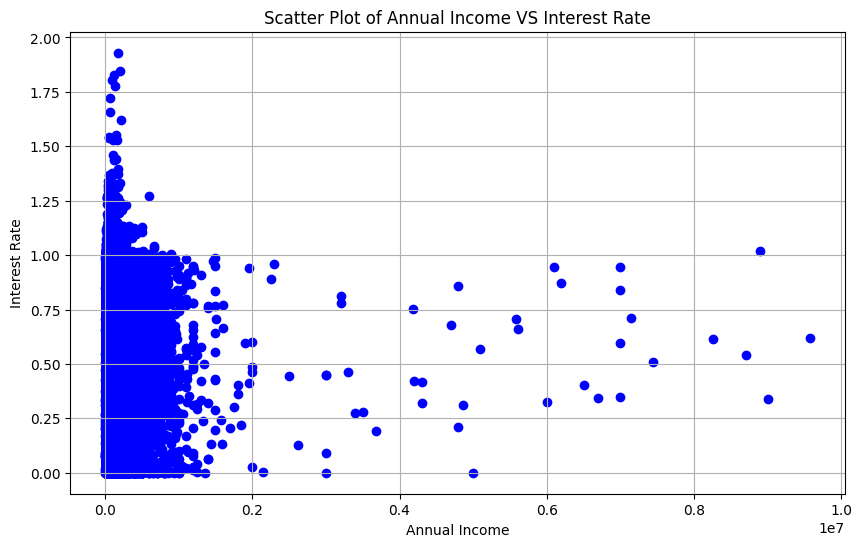

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(train.annual_inc, train.revol_util, c="blue", marker="o")
plt.title("Scatter Plot of Annual Income VS Interest Rate")
plt.xlabel("Annual Income")
plt.ylabel("Interest Rate")
plt.grid()
plt.show()

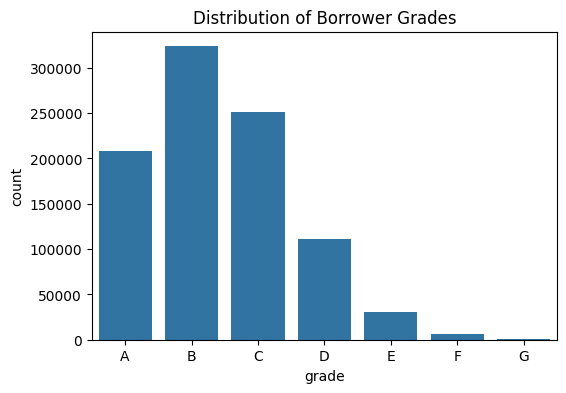

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=loan_data['grade'], order=sorted(loan_data['grade'].unique()))
plt.title('Distribution of Borrower Grades')
plt.show()


Text(0.5, 1.0, 'Interest Rate by Credit Grade')

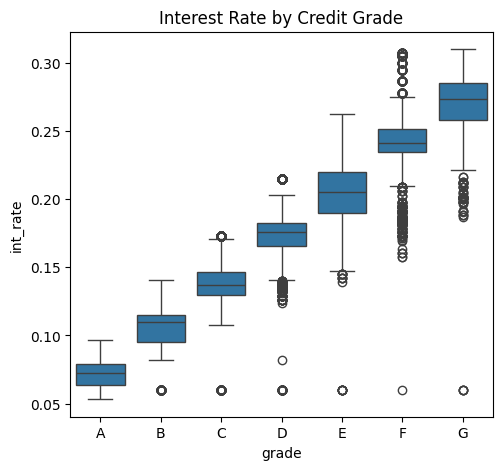

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='grade', y='int_rate', data=loan_data, order=sorted(loan_data['grade'].unique()))
plt.title('Interest Rate by Credit Grade')

In [ ]:
### Assuming your DataFrame is already loaded as d
plt.figure(figsize=(10, 6))
sns.regplot(x='fico_range_high', y='int_rate', data=loan_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relationship between FICO Score and Interest Rate')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()

# Calculate Pearson's correlation coefficient
correlation = loan_data['fico_range_high'].corr(loan_data['int_rate'])
print("Pearson's correlation coefficient:", correlation)

#### Histogram and Log Transform

#### Handling Missing values 

In [ ]:
def missing_percentage(loan_data):
    """This function takes a DataFrame(loan_data) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = loan_data.isnull().sum().sort_values(ascending = False)[loan_data.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(loan_data.isnull().sum().sort_values(ascending = False)/len(loan_data)*100,2)[round(loan_data.isnull().sum().sort_values(ascending = False)/len(loan_data)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

,Total,Percent
mths_since_last_delinq,324826,49.73
emp_length,40888,6.26


In [ ]:
#GEN AI USED
import pandas as pd

# Load the dataset
csv_path = r"C:\Users\VIDUR\Desktop\PYTHON\FA590\lc_loan.csv"
loan_data = pd.read_csv(csv_path)

# Drop rows with missing values in the target variable 'return'
loan_data = loan_data.dropna(subset=['return'])

# Fill missing values in numeric columns with the mean
# Select only numeric columns
numeric_columns = loan_data.select_dtypes(include=[np.number]).columns
loan_data[numeric_columns] = loan_data[numeric_columns].fillna(loan_data[numeric_columns].mean())

# For non-numeric columns, you can either drop them or fill with a placeholder (e.g., 'Unknown')
# Here, we drop non-numeric columns for simplicity
non_numeric_columns = loan_data.select_dtypes(exclude=[np.number]).columns
loan_data = loan_data.drop(columns=non_numeric_columns)

# Display the first few rows of the cleaned dataset
print(loan_data.head())

        id  loan_amnt  funded_amnt  int_rate  installment  annual_inc    dti  \
0  1077501       5000         5000    0.1065       162.87     24000.0  27.65   
1  1077175       2400         2400    0.1596        84.33     12252.0   8.72   
2  1076863      10000        10000    0.1349       339.31     49200.0  20.00   
3  1075269       5000         5000    0.0790       156.46     36000.0  11.20   
4  1072053       3000         3000    0.1864       109.43     48000.0   5.35   

   delinq_2yrs  fico_range_low  fico_range_high  ...  total_acc  \
0            0             735              739  ...          9   
1            0             735              739  ...         10   
2            0             690              694  ...         37   
3            0             730              734  ...         12   
4            0             660              664  ...          4   

   collections_12_mths_ex_med  acc_now_delinq  chargeoff_within_12_mths  \
0                           0            

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets in a 7:3 ratio
train, test = train_test_split(loan_data, test_size=0.3, random_state=42)

# Reset the indices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Display the size of the train and test sets
print("Size of Train Dataset : " + str(train.shape))
print("Size of Test Dataset : " + str(test.shape))

NameError: name 'loan_data' is not defined

In [ ]:
#GEN AI USED
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



# Define the features and target variable
features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'revol_bal', 'revol_util', 'total_acc']
target = 'return'

# Extract features and target from the train and test sets
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Build Lasso Regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Build Ridge Regression model
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Build Elastic Net model
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)


# Build Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree_model.fit(X_train, y_train)





NameError: name 'train' is not defined

In [ ]:
#GEN AI USED
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test data
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R2 Score: {r2}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_elastic_net, "Elastic Net")

y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate model performance
mse_decision_tree = mean_squared_error(y_test, y_pred)
print(f"Decision Tree Mean Squared Error: {mse_decision_tree}")


Linear Regression - Mean Squared Error: 0.061185647923098475, R2 Score: 0.0051603387857243055
Lasso Regression - Mean Squared Error: 0.06150184719017488, R2 Score: 1.9140115574467487e-05
Ridge Regression - Mean Squared Error: 0.06118563502150077, R2 Score: 0.005160548557485045
Elastic Net - Mean Squared Error: 0.061356084773642336, R2 Score: 0.0023891441606941344


In [ ]:
#GEN AI USED
# Load the test dataset
test_csv_path = r"C:\Users\VIDUR\Desktop\PYTHON\FA590\Assignment #1\lc_loan_test.csv"
lc_loan_test = pd.read_csv(test_csv_path)

# Handle missing values in the test dataset
# Fill missing values in numeric columns with the mean
numeric_columns = lc_loan_test.select_dtypes(include=[np.number]).columns
lc_loan_test[numeric_columns] = lc_loan_test[numeric_columns].fillna(lc_loan_test[numeric_columns].mean())

# Drop non-numeric columns (if any)
non_numeric_columns = lc_loan_test.select_dtypes(exclude=[np.number]).columns
lc_loan_test = lc_loan_test.drop(columns=non_numeric_columns)

# Display the first few rows of the cleaned test dataset
print(lc_loan_test.head())

   id  loan_amnt  funded_amnt  int_rate  installment  annual_inc    dti  \
0   1      10000        10000    0.0749       311.02     50000.0  26.43   
1   2      13000        13000    0.1144       428.32     54500.0  10.81   
2   3       3025         3025    0.0699        93.39     83000.0  20.76   
3   4       9000         9000    0.1139       296.32     60000.0  19.58   
4   5      12000        12000    0.0699       370.48     56000.0  17.90   

   delinq_2yrs  fico_range_low  fico_range_high  ...  revol_util  total_acc  \
0            0             755              759  ...       0.192         19   
1            0             740              744  ...       0.335         23   
2            0             695              699  ...       0.673         24   
3            0             780              784  ...       0.300         25   
4            0             775              779  ...       0.240         28   

   collections_12_mths_ex_med  acc_now_delinq  chargeoff_within_12_mths  \

In [ ]:
# Extract the same features used in the training data
X_test_new = lc_loan_test[features]

# Standardize the test data using the same scaler fitted on the training data
X_test_new = scaler.transform(X_test_new)

In [ ]:
#GEN AI USED
# Predict on the new test data
y_pred_linear_new = linear_model.predict(X_test_new)
y_pred_lasso_new = lasso_model.predict(X_test_new)
y_pred_ridge_new = ridge_model.predict(X_test_new)
y_pred_elastic_net_new = elastic_net_model.predict(X_test_new)
y_pred_decision_tree_new = decision_tree_model.predict(X_test_new)


# Add the predictions to the test dataset
lc_loan_test['predicted_return_linear'] = y_pred_linear_new
lc_loan_test['predicted_return_lasso'] = y_pred_lasso_new
lc_loan_test['predicted_return_ridge'] = y_pred_ridge_new
lc_loan_test['predicted_return_elastic_net'] = y_pred_elastic_net_new
lc_loan_test['predicted_decision_tree'] = y_pred_decision_tree_new

# Display the first few rows of the test dataset with predictions
print(lc_loan_test.head())

   id  loan_amnt  funded_amnt  int_rate  installment  annual_inc    dti  \
0   1      10000        10000    0.0749       311.02     50000.0  26.43   
1   2      13000        13000    0.1144       428.32     54500.0  10.81   
2   3       3025         3025    0.0699        93.39     83000.0  20.76   
3   4       9000         9000    0.1139       296.32     60000.0  19.58   
4   5      12000        12000    0.0699       370.48     56000.0  17.90   

   delinq_2yrs  fico_range_low  fico_range_high  ...  \
0            0             755              759  ...   
1            0             740              744  ...   
2            0             695              699  ...   
3            0             780              784  ...   
4            0             775              779  ...   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  \
0                         0            0                     0          0   
1                         0            0                  

In [ ]:
#GEN AI USED
# Load the existing submission_test.csv file
submission_path = r"C:\Users\VIDUR\Desktop\PYTHON\FA590\submission_test.csv"
submission = pd.read_csv(submission_path)

# Replace the 'return' column with the predicted return values from one of the models
# For example, using Linear Regression predictions
submission['return'] = y_pred_linear_new  # Replace with the desired model's predictions

# Drop the 'returns' column if it exists (optional)
if 'returns' in submission.columns:
    submission = submission.drop(columns=['returns'])

# Save the updated submission file to the specified path
submission.to_csv(submission_path, index=False)

print(f"Submission file updated and saved to {submission_path}")

Submission file updated and saved to C:\Users\VIDUR\Desktop\PYTHON\FA590\submission_test.csv
